<a href="https://colab.research.google.com/github/NishaGanesan05/rd-infrotech-task1-6/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://github.com/KimathiNewton/Telco-Customer-Churn/raw/master/Datasets/telco_churn.csv"
data = pd.read_csv(url)

# Inspect the first few rows and columns to check the structure
print(data.head())
print("\nColumns in the dataset:")
print(data.columns)

   Unnamed: 0  customerID  gender SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female         False    True      False       1   
1           1  5575-GNVDE    Male         False   False      False      34   
2           2  3668-QPYBK    Male         False   False      False       2   
3           3  7795-CFOCW    Male         False   False      False      45   
4           4  9237-HQITU  Female         False   False      False       2   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0        False           NaN             DSL  ...            False   
1         True         False             DSL  ...             True   
2         True         False             DSL  ...            False   
3        False           NaN             DSL  ...             True   
4         True         False     Fiber optic  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False       


Columns in the dataset:
Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

Columns after one-hot encoding:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_No', 'Partner_True', 'Partner_Yes',
       'Dependents_No', 'Dependents_True', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_True', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_True',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_True',
       '

<ipython-input-6-14c425574699>:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = data.groupby(['Tenure_Segment', 'MonthlyCharges_Segment',
<ipython-input-6-14c425574699>:63: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(churn_rate.pivot_table(index='Tenure_Segment',


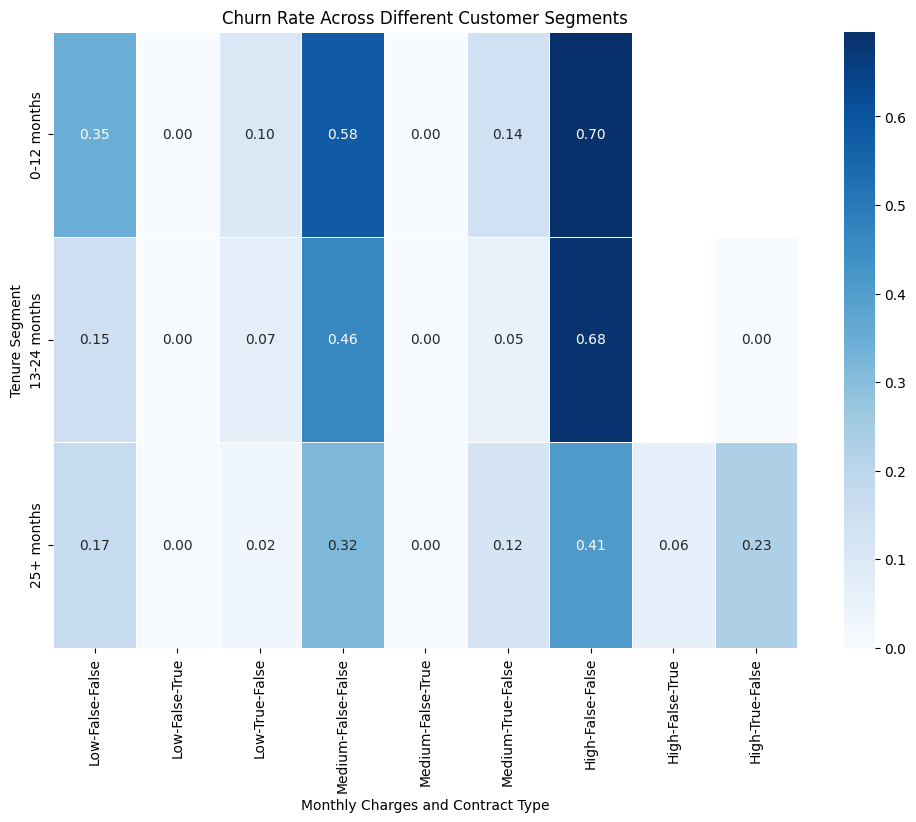

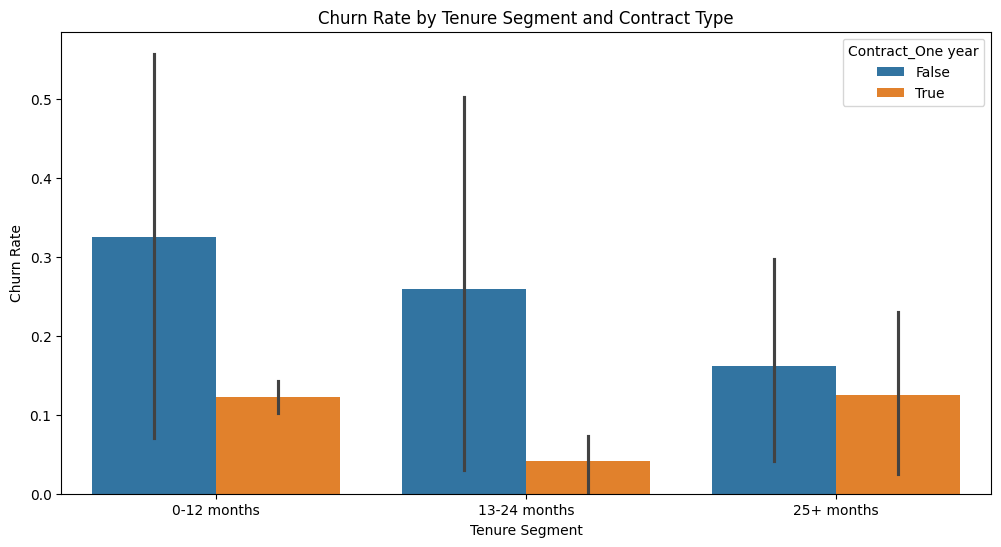

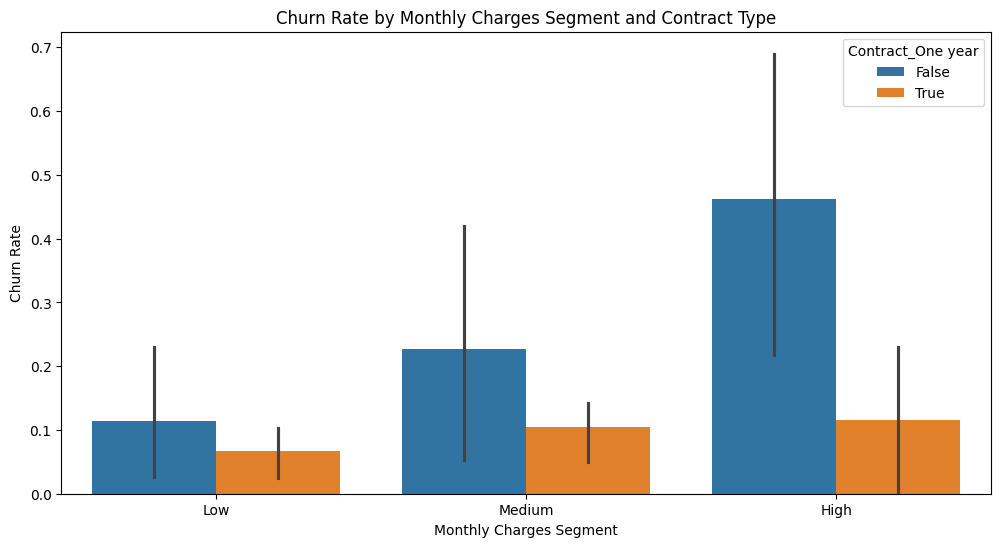

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/KimathiNewton/Telco-Customer-Churn/raw/master/Datasets/telco_churn.csv"
data = pd.read_csv(url)

# Inspect the dataset (check columns)
print("\nColumns in the dataset:")
print(data.columns)

# Step 1: Drop unnecessary columns and handle missing data
data.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)

# Step 2: Convert 'TotalCharges' to numeric and handle errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
data.dropna(subset=['TotalCharges'], inplace=True)

# Convert 'SeniorCitizen' to binary format (0 and 1)
data['SeniorCitizen'] = data['SeniorCitizen'].replace({'True': 1, 'False': 0}).astype(int)

# Step 3: One-Hot Encode the categorical columns (including Contract)
# One-Hot Encode the categorical columns (including Contract)
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Print columns to check the results of one-hot encoding
print("\nColumns after one-hot encoding:")
print(data.columns)

# Step 4: Create customer segments based on 'tenure', 'MonthlyCharges', and 'Contract'
# Segment customers by tenure (0-12 months, 13-24 months, 25+ months)
data['Tenure_Segment'] = pd.cut(data['tenure'], bins=[0, 12, 24, np.inf], labels=['0-12 months', '13-24 months', '25+ months'])

# Segment customers by MonthlyCharges (Low, Medium, High)
data['MonthlyCharges_Segment'] = pd.cut(data['MonthlyCharges'], bins=[0, 50, 100, np.inf], labels=['Low', 'Medium', 'High'])

# Step 5: Analyze Churn Rates Across Segments

# Check the unique values in the 'Churn' column to confirm its format
print(data['Churn'].unique())

# Convert 'Churn' column to numeric (True = 1, False = 0)
data['Churn'] = data['Churn'].map({'True': 1, 'False': 0})

# Verify the change
print(data['Churn'].unique())

# Now, group by tenure, monthly charges, and contract type, and calculate churn rate
churn_rate = data.groupby(['Tenure_Segment', 'MonthlyCharges_Segment',
                           'Contract_One year', 'Contract_Two year'])['Churn'].mean().reset_index()

# Visualize churn rate across different segments
plt.figure(figsize=(12, 8))
sns.heatmap(churn_rate.pivot_table(index='Tenure_Segment',
                                   columns=['MonthlyCharges_Segment', 'Contract_One year',
                                            'Contract_Two year'],
                                   values='Churn'), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Churn Rate Across Different Customer Segments")
plt.ylabel("Tenure Segment")
plt.xlabel("Monthly Charges and Contract Type")
plt.show()

# Alternatively, you can plot individual segment comparisons:
plt.figure(figsize=(12, 6))
sns.barplot(x='Tenure_Segment', y='Churn', hue='Contract_One year', data=churn_rate)
plt.title('Churn Rate by Tenure Segment and Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Segment')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='MonthlyCharges_Segment', y='Churn', hue='Contract_One year', data=churn_rate)
plt.title('Churn Rate by Monthly Charges Segment and Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Monthly Charges Segment')
plt.show()

